<a href="https://colab.research.google.com/github/asif2042/AI_Models/blob/main/Cat-Dog-Classifier/Cat_vs_Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 166MB/s]
100% 1.06G/1.06G [00:05<00:00, 193MB/s]


In [3]:
import zipfile
obj  = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
obj.extractall('/mydir')
obj.close()

In [4]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory


In [5]:
train = image_dataset_from_directory(
    directory = '/mydir/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
test = image_dataset_from_directory(
    directory = '/mydir/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size  = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:
import tensorflow as tf

# Normalization function
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Convert to float first, then normalize
    return image, label

# Apply normalization to datasets
train = train.map(process)
test = test.map(process)


In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation='relu', input_shape = (256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding = 'valid', activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding = 'valid', activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train, epochs = 10, validation_data = test)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 84ms/step - accuracy: 0.5754 - loss: 2.6275 - val_accuracy: 0.6648 - val_loss: 0.6150
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.6959 - loss: 0.5828 - val_accuracy: 0.6612 - val_loss: 0.5956
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.7575 - loss: 0.5064 - val_accuracy: 0.7260 - val_loss: 0.5354
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7945 - loss: 0.4439 - val_accuracy: 0.7762 - val_loss: 0.4760
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8243 - loss: 0.3858 - val_accuracy: 0.7574 - val_loss: 0.5357
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8585 - loss: 0.3311 - val_accuracy: 0.7886 - val_loss: 0.4395
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8974 - loss: 0.2476 - val_accuracy: 0.7264 - val_loss: 0.6703
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9295 - loss: 0.1770 - 

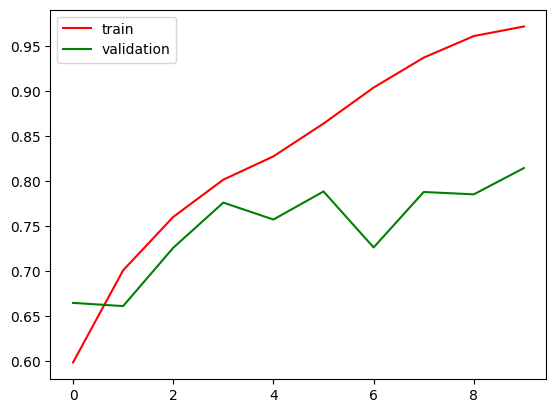

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'] , color = 'green', label = 'validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_img_1 = cv2.imread('3.jpg')
test_img_2 = cv2.imread('cat.jpg')


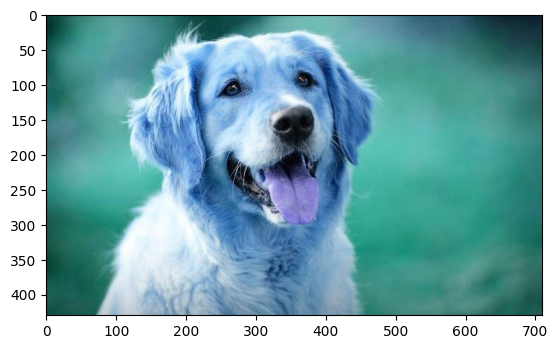

In [16]:
plt.imshow(test_img_1)

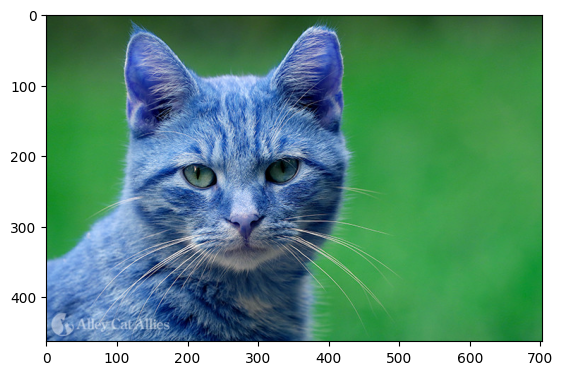

In [17]:
plt.imshow(test_img_2)

In [18]:
test_img_1.shape

(430, 710, 3)

In [19]:
test_img_1 = cv2.resize(test_img_1,(256,256)) /256
test_img_2 = cv2.resize(test_img_2,(256,256)) / 256

In [20]:
test_img_1.shape

(256, 256, 3)

In [21]:
test_img_1 = test_img_1.reshape((1,256,256,3))
test_img_2 = test_img_2.reshape((1,256,256,3))

In [22]:
model.predict(test_img_1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


array([[0.99842995]], dtype=float32)

In [23]:
model.predict(test_img_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.8365452]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Dog
[[0.9995757]]


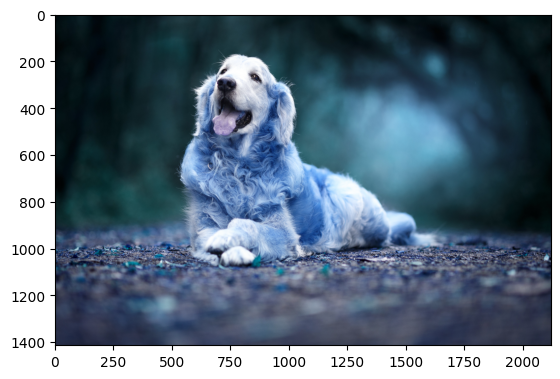

In [39]:
import cv2
import numpy as np

# Load and preprocess the test image
test_image = cv2.imread("/content/dog.jpg")
plt.imshow(test_image)  # Replace with your image path
test_image = cv2.resize(test_image, (256, 256))    # Resize to match training input size
test_image = test_image / 256.0                    # Normalize pixel values
test_image = test_image.reshape((1, 256, 256, 3))  # Add batch dimension

# Predict
predictions = model.predict(test_image)

# Interpret the output
if predictions[0] > 0.5:
    print("Dog")
else:
    print("Cat")

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Cat
[[2.182609e-06]]


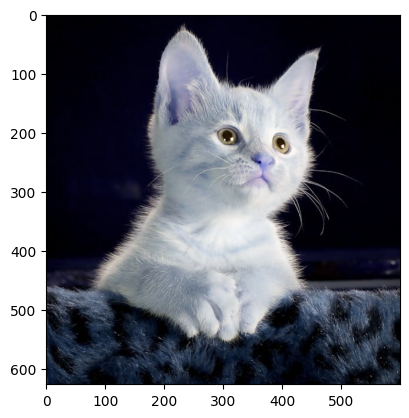

In [40]:

# Load and preprocess the test image
test_image = cv2.imread("/content/kitty-cat-kitten-pet-45201.jpeg")
plt.imshow(test_image)  # Replace with your image path
test_image = cv2.resize(test_image, (256, 256))    # Resize to match training input size
test_image = test_image / 256.0                    # Normalize pixel values
test_image = test_image.reshape((1, 256, 256, 3))  # Add batch dimension

# Predict
predictions = model.predict(test_image)

# Interpret the output
if predictions[0] > 0.5:
    print("Dog")
else:
    print("Cat")

print(predictions)